# Método dos Mínimos Quadrados (Lista de Exercícios)

<!---Vamos utilizar o Jupyter para resolver problemas de ajuste de curvas pelo MMQ através do Python--->


# Grupo:


*   ANNA LIVIA FREIRE MACHADO
*   BEATRIZ MOURA ALMEIDA
*   JOAO VICTOR FREIRE DE MATOS BARBOSA
*   RALF DEWRICH FERREIRA



In [198]:
import sympy as sym
from scipy.stats import linregress
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display,Math

**Coeficientes da melhor reta ajustada pelo MMQ**
- $a=\frac{\bar{x} \bar{y}-\bar{x} \bar{y}}{x^2-\bar{x}^2}$,
- $b=\frac{\bar{y} \bar{x}^2-\bar{x} x \bar{y}}{\bar{x}^2-\bar{x}^2}$.

**Exemplo 1.** 
Considere os dados da tabela abaixo. Encontre a reta de mínimos quadrados que aproxima esse dados e faça um gráfico comparando os dados com a reta obtida.


| **x**  | **y**   |
|:-------:|:--------:|
|   1    |  1.3   |
|   2    |  3.5   |
|   3    |  4.2   |
|   4    |  5.0   |
|   5    |  7.0   |
|   6    |  8.8   |
|   7    |  10.1  |
|   8    |  12.5  |
|   9    |  13.0  |
|   10   |  15.6  |

Das equações acima, temos que
$$
a=\frac{57,24-(5,5)(8,1)}{38,5-5,5^2}=1,538
$$
e
$$
b=\frac{(38,5)(8,1)-(5,5)(57,24)}{38,5-5,5^2}=-0,360 .
$$
de modo que $r(x)=1,54 x-0,36$.
O gráfico dessa reta e os pontos dados são mostrados na figura abaixo.

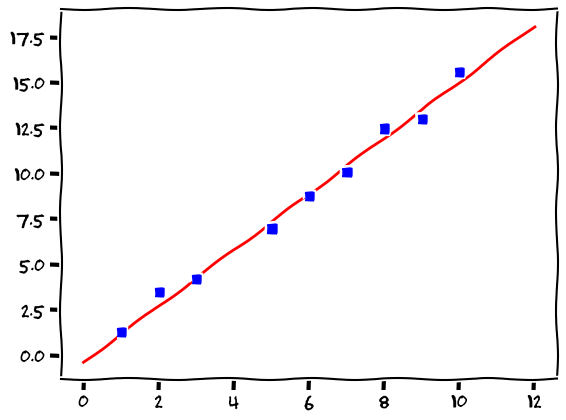

In [199]:
x = np.linspace(0,12,20)
y = 1.54*x - 0.36 
with plt.xkcd(): # gráfico a mão livre
    plt.plot(x,y,'r-')
    plt.plot(1,1.3,'sb',2,3.5,'sb',3,4.2,'sb',5,7,'sb',6,8.8,'sb',7,10.1,'sb',8,12.5,'sb',9,13,'sb',10,15.6,'sb')
    #plt.grid()
    plt.show ()

**Exercício 2.**  Considere o teste mecânico realizado para estabelecer a relação entre as tensões ($\sigma)$ e  deformações ($\varepsilon$) de uma amostra de tecido biológico (um disco intervertebral), como representado na figura abaixo. 

![image.png](attachment:image.png)

Onde foram obtidos os seguintes valores:

Tabela: Valores da deformação para diferentes valores de um stress aplicado no
disco intervertebral

| teste | tensão $\sigma$ | deformação $\varepsilon$ |
|:-----:|:----------------:|:-------------------------:|
| 1     | 0\.00            | 0\.00                     |
| 2     | 0\.06            | 0\.08                     |
| 3     | 0\.14            | 0\.14                     |
| 4     | 0\.25            | 0\.20                     |
| 5     | 0\.31            | 0\.23                     |
| 6     | 0\.47            | 0\.25                     |
| 7     | 0\.60            | 0\.28                     |
| 8     | 0\.70            | 0\.29                     |

Mostre que a reta ajustada pelo MMQ é dada por $\varepsilon = 0,37 \sigma + 0,07.$

In [200]:
x = np.array([0.00, 0.06, 0.14, 0.25, 0.31, 0.47, 0.60, 0.70])
y = np.array([0.00, 0.08, 0.14, 0.20, 0.23, 0.25, 0.28, 0.29])

Na primeira linha, tem a matriz "values" com duas colunas: a primeira coluna é sigma, e a segunda coluna contém apenas o valor 1 (para representar o coeficiente linear);

O "vstack" empilha os arrays e o método "T" transpõe a matriz para ficar com duas linhas e duas colunas.

Na segunda linha, "lstsq" é usado para calcular os coeficientes m e c da reta ajustada.

In [201]:
values = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(values, y, rcond=None)[0]

print("A reta ajustada pelo MMQ é: ε = {:.2f}σ + {:.2f}".format(m, c))

A reta ajustada pelo MMQ é: ε = 0.37σ + 0.07


**Exercício 2.** Suponha que sejam fornecidos os seguintes dados de laboratório para as variáveis $x_i$ e $y_i$.

Tabela: Valores da deformação para diferentes valores de tensão stress aplicado no disco intervertebral

| $x_i$ | \-1\.0  | \-0\.7  | \-0\.4 | \-0\.1 | 0\.2   | \-0\.5 | 0\.8   | 1\.0   |
|:-------------:|:-------:|:-------:|:------:|:------:|:------:|:------:|:------:|:------:|
| $y_i$ | 36\.547 | 17\.264 | 8\.155 | 3\.852 | 1\.820 | 0\.860 | 0\.406 | 0\.246 |


Faça os gráficos $x \times y$ e $x \times \ln y$ e verifique (qualitativamente) as retas ajustadas para cada caso.

In [202]:
x = np.array([-1.0, -0.7, -0.4, -0.1, 0.2, -0.5, 0.8, 1.0])
y = np.array([36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246])

In [203]:
# logaritmo natural de y
ln_y = np.log(y)

# "linregress" retorna cinco valores: a (coeficiente angular), b (coeficiente linear), 
# r_value (coeficiente de correlação), p_value (valor p) e std_err (erro padrão)
# somente "a" e "b" estão sendo usados para calcular a reta 

a, b, r_value, p_value, std_err = linregress(x, y)
reta_xy = a*x + b

a, b, r_value, p_value, std_err = linregress(x, ln_y)
reta_xlny = a*x + b

<ipython-input-204-ac3281de9e57>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, reta_xy, 'r-', label='y=ax+b', color='red')
<ipython-input-204-ac3281de9e57>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, reta_xlny, 'r-', label='y=ax+b', color='red')


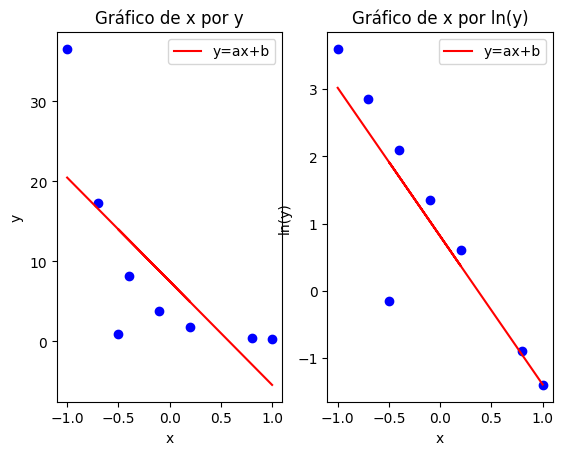

In [204]:
# gráfico x por y
plt.subplot(121)
plt.plot(x, y, 'o', color='blue')
plt.plot(x, reta_xy, 'r-', label='y=ax+b', color='red')
plt.legend()
plt.title('Gráfico de x por y')
plt.xlabel('x')
plt.ylabel('y')

# gráfico x por ln(y)
plt.subplot(122)
plt.plot(x, ln_y, 'o', color='blue')
plt.plot(x, reta_xlny, 'r-', label='y=ax+b', color='red')
plt.legend()
plt.title('Gráfico de x por ln(y)')
plt.xlabel('x')
plt.ylabel('ln(y)')

plt.show()

**Exercício 3.** Proponha uma mudança de variáveis para usar o MMQ para uma curva exponencial
$$
y=\alpha_1 \alpha_2^x
$$

In [205]:
x = np.array([-1.0, -0.7, -0.4, -0.1, 0.2, -0.5, 0.8, 1.0])
y = np.array([36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246])

# mudou as variaveis
z = np.log(y)
w = x

In [206]:
# "matrix" representa a equação linear "z = m*x + c"

# "m" é o coeficiente angular e "c" é o coeficiente linear da reta

# "np.linalg.lstsq()" é para achar os valres de "m" e "c"

matrix = np.vstack([w, np.ones(len(w))]).T
m, c = np.linalg.lstsq(matrix, z, rcond=None)[0]
alpha1 = np.exp(c)
alpha2 = np.exp(m)

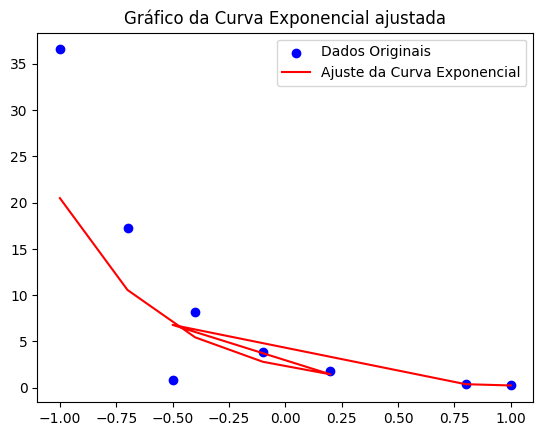

In [207]:
# a curva exponencial ajustada é calculada em "a" e "b"
plt.scatter(x, y, label='Dados Originais', color='blue')
plt.plot(x, alpha1 * alpha2 ** x, label='Ajuste da Curva Exponencial', color='red')
plt.legend()
plt.title('Gráfico da Curva Exponencial ajustada')
plt.show()



**Exercício 4.** Proponha uma mudança de variáveis para usar o MMQ para uma curva geométrica
$$
y=\alpha_1 x^{\alpha_2}
$$


In [208]:
# função geométrica
def geometric(x, alpha1, alpha2):
    return alpha1 * x ** alpha2

x = np.array([-1.0, -0.7, -0.4, -0.1, 0.2, -0.5, 0.8, 1.0])
y = np.array([36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246])

# mudou as variaveis
x += np.abs(np.min(x)) + 1 # adicionamos uma constante para evitar log de número negativo
y = np.log(y)

In [209]:
# ajuste da curva
popt, pcov = curve_fit(geometric, x, y)

In [210]:
# estimativas
x_est = np.linspace(np.min(x), np.max(x), 100)
y_est = np.exp(geometric(x_est, *popt))

<ipython-input-211-6ec7d10db733>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label='Dados', color='blue')
<ipython-input-211-6ec7d10db733>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_est, np.log(y_est), 'r-', label='Ajuste da Curva Geométrica', color='red')


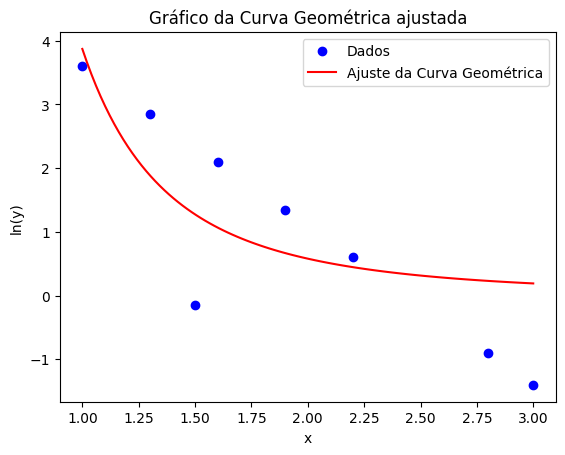

In [211]:
plt.plot(x, y, 'bo', label='Dados', color='blue')
plt.plot(x_est, np.log(y_est), 'r-', label='Ajuste da Curva Geométrica', color='red')
plt.xlabel('x')
plt.ylabel('ln(y)')
plt.title('Gráfico da Curva Geométrica ajustada')
plt.legend()
plt.show()


**Exercício 5.** Estabeleça os coeficientes $a, b$ e $c$ para o ajuste quadrático $y=a x^2+b x+c$ para um conjunto de dados.

In [212]:
x = np.array([-1.0, -0.7, -0.4, -0.1, 0.2, -0.5, 0.8, 1.0])
y = np.array([36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246])

# usamos "polyfit" pra ajustar um polinômio de segundo grau a "x" e "y" e retornar os coeficientes "a", "b" e "c"
a, b, c = np.polyfit(x, y, 2)

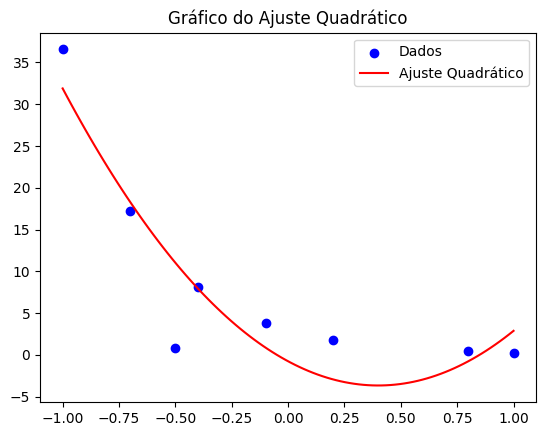

In [213]:
plt.scatter(x, y, label='Dados', color='blue')

# "x_range" é um array com 100 valores igualmente espaçados entre o valor mínimo e o máximo em x
x_range = np.linspace(x.min(), x.max(), 100)

# y = ax^2 + bx + c
plt.plot(x_range, a*x_range**2 + b*x_range + c, label='Ajuste Quadrático', color='red')
plt.legend()
plt.title('Gráfico do Ajuste Quadrático')
plt.show()